In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

 - https://math.stackexchange.com/questions/3196634/how-to-remove-this-numerical-artifact
 - https://docs.scipy.org/doc/scipy/reference/integrate.html
 - https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.solve_bvp.html
 - https://math.stackexchange.com/questions/3185707/how-to-numerically-set-up-to-solve-this-differential-equation
 
 $$\frac{d f}{d\theta} = \frac{1}{c}(\text{max}(\sin\theta, 0) - f^4)~,$$

In [2]:
def model(t, y, c=0.03):
    return (np.max([np.sin(t), 0]) - y**4)/c

In [3]:
t0 = 0
tmax = 10
y0 = np.array([0.35]) # 

In [4]:
ode = integrate.BDF(model, t0, y0, tmax)

In [5]:
t, y = [], []
while ode.status == 'running':
    ode.step()
    t.append(ode.t)
    y.append(ode.y)

In [6]:
ode.status # finished

'finished'

In [7]:
t2 = np.linspace(0, tmax, 100)
sol = integrate.odeint(model, y0, t2, tfirst=True)

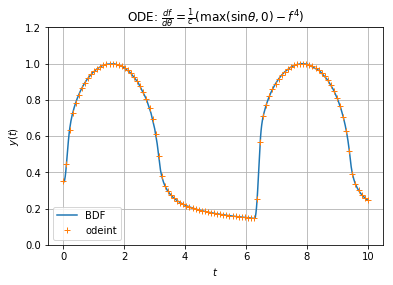

In [8]:
fig, axe = plt.subplots()
axe.plot(t, y, label="BDF")
axe.plot(t2, sol, '+', label="odeint")
axe.set_title(r"ODE: $\frac{d f}{d\theta} = \frac{1}{c}(\max(\sin\theta, 0) - f^4)$")
axe.set_xlabel("$t$")
axe.set_ylabel("$y(t)$")
axe.set_ylim([0, 1.2])
axe.legend()
axe.grid()